In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [11]:
test_info = pd.read_csv("./test_info_mlfd.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.000000e-10,0.3,10,0.001,3.0,100.0,True,3,9576.448276,0.379444
1,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.000000e-10,0.3,10,0.010,3.0,100.0,True,3,9472.724138,0.390000
2,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.000000e-10,0.3,10,0.100,3.0,100.0,True,3,9933.245902,0.328333
3,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.000000e-10,0.3,10,0.500,3.0,100.0,True,3,15004.460317,0.301667
4,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.000000e-10,0.3,10,0.750,3.0,100.0,True,3,28380.754098,0.268889


## Compare effect on FD QoS metrics when increasing chance of message loss

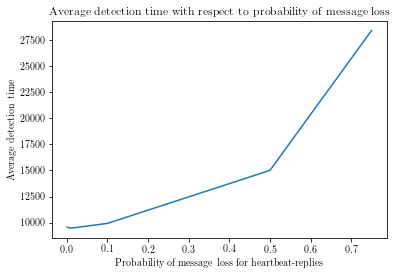

In [12]:
detect_sample = test_info.loc[:,["messageLossProb", "averageDetectiontime"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["averageDetectiontime"].values
plt.plot(time, nodes)
plt.ylabel('Average detection time')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Average detection time with respect to probability of message loss')
plt.show()

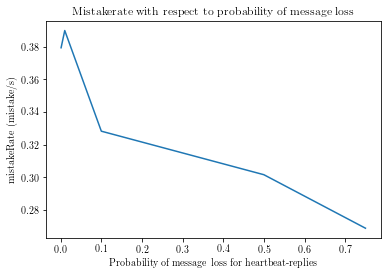

In [13]:
detect_sample = test_info.loc[:,["messageLossProb", "mistakeRate"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["mistakeRate"].values
plt.plot(time, nodes)
plt.ylabel('mistakeRate (mistake/s)')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Mistakerate with respect to probability of message loss')
plt.show()

In [14]:
test_info = pd.read_csv("./test_info_epfd.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,rand,averageDetectiontime,mistakeRate
0,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.001,nil,100.0,True,3,21139.913793,0.051111
1,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.010,nil,100.0,True,3,20930.965517,0.051111
2,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.100,nil,100.0,True,3,20630.229508,0.051667
3,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.500,nil,100.0,True,3,27895.190476,0.058333
4,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.750,nil,100.0,True,3,48049.147541,0.063333


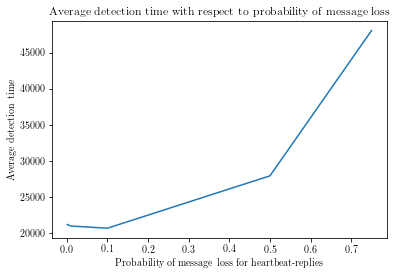

In [15]:
detect_sample = test_info.loc[:,["messageLossProb", "averageDetectiontime"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["averageDetectiontime"].values
plt.plot(time, nodes)
plt.ylabel('Average detection time')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Average detection time with respect to probability of message loss')
plt.show()

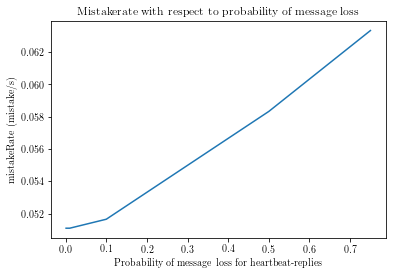

In [16]:
detect_sample = test_info.loc[:,["messageLossProb", "mistakeRate"]]
time = detect_sample["messageLossProb"].values
nodes = detect_sample["mistakeRate"].values
plt.plot(time, nodes)
plt.ylabel('mistakeRate (mistake/s)')
plt.xlabel('Probability of message loss for heartbeat-replies')
plt.title('Mistakerate with respect to probability of message loss')
plt.show()

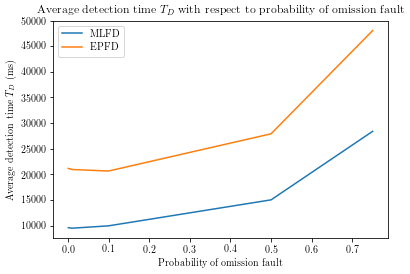

In [19]:
test_info_mlfd = pd.read_csv("./test_info_mlfd.csv")
test_info_epfd = pd.read_csv("./test_info_epfd.csv")
mlfd_data = test_info_mlfd.loc[:,["messageLossProb", "averageDetectiontime"]]
mlfd_mlp = mlfd_data["messageLossProb"].values
mlfd_adt = mlfd_data["averageDetectiontime"].values
plt.plot(mlfd_mlp, mlfd_adt, label="MLFD")
epfd_data = test_info_epfd.loc[:,["messageLossProb", "averageDetectiontime"]]
epfd_mlp = epfd_data["messageLossProb"].values
epfd_adt = epfd_data["averageDetectiontime"].values
plt.plot(epfd_mlp, epfd_adt, label="EPFD")
plt.ylabel(r'Average detection time $T_D$ (ms)')
plt.xlabel(r'Probability of omission fault')
plt.title(r'Average detection time $T_D$ with respect to probability of omission fault')
plt.legend()
plt.savefig('detectiontime_mloss.eps', format='eps', dpi=1000)
plt.show()

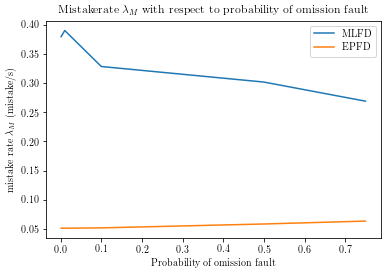

In [20]:
test_info_mlfd = pd.read_csv("./test_info_mlfd.csv")
test_info_epfd = pd.read_csv("./test_info_epfd.csv")
mlfd_data = test_info_mlfd.loc[:,["messageLossProb", "mistakeRate"]]
mlfd_mlp = mlfd_data["messageLossProb"].values
mlfd_adt = mlfd_data["mistakeRate"].values
plt.plot(mlfd_mlp, mlfd_adt, label="MLFD")
epfd_data = test_info_epfd.loc[:,["messageLossProb", "mistakeRate"]]
epfd_mlp = epfd_data["messageLossProb"].values
epfd_adt = epfd_data["mistakeRate"].values
plt.plot(epfd_mlp, epfd_adt, label="EPFD")
plt.ylabel(r'mistake rate $\lambda_M$ (mistake/s)')
plt.xlabel(r'Probability of omission fault')
plt.title(r'Mistakerate $\lambda_M$ with respect to probability of omission fault')
plt.legend()
plt.savefig('mistakerate_mloss.eps', format='eps', dpi=1000)
plt.show()